## Import packages

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import intake
import s3fs

## Load catalog

In [2]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

### print catalog

In [3]:
# Print the catalog to get a summary of its contents
catalog

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,709
grid_label,10
zstore,522217
dcpp_init_year,60


In [4]:
# Convert the catalog to a Pandas datazrame
cat_df = catalog.df

# print the contents of the datazrame
cat_df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ta,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,tauv,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,zg,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,vas,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/HighResMIP/CMCC/CMCC-CM2-...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
522212,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,uas,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207
522213,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,va,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207
522214,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,wap,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207
522215,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207


## Query Database

The activity_id we are interested in is `CMIP` as that contains historical simulation data.

In [5]:
# Search through catalog, find all historical simulations
# ("activity_id=CMIP", "experiment_id=historical")
res = catalog.search(activity_id="CMIP", experiment_id="historical")

# Convert to a data frame
res_df = res.df

### we'll go with variable id `mrso`, for soil_moisture_content

In [6]:
res_df.variable_id.loc[lambda x: x == "mrso"]

67       mrso
68       mrso
348      mrso
786      mrso
916      mrso
         ... 
82191    mrso
83261    mrso
83443    mrso
83890    mrso
85483    mrso
Name: variable_id, Length: 623, dtype: object

## Specify our activity ids

In [7]:
# activity_id = specify project in which simulations fall under
activity_ids = ['ScenarioMIP', 'CMIP'] # future projections and historical

# source_id = model names
# "EC-Earth3-Veg" from EC-Earth-Consortorium/Europe, "GFDL-GM4" from NOAA
# models = ['MIROC6', 'NorESM2-LM']
models = ["EC-Earth3-Veg", "CanESM5", "BCC-CSM2-MR"] 

# experimental_ids = scenarios (or historical)
scenarios = ['historical', 'ssp245', 'ssp585']

# member_id = ensemble member the set of programmed conditions that affect the behavior of the model. We can program a model with different environmental factors, even different physics just to see what happens.
conditions = 'r1i1p1f1'

# table_id = specify spatial and temporal window & resolution
spatial_temporal = 'Lmon' # Monthly land surface and soil model fields

# variable_id = climatic variable
variable = "mrso" # soil moisture content

In [8]:
soil_res = catalog.search(activity_id=activity_ids, source_id = models, experiment_id=scenarios, member_id = conditions, table_id = spatial_temporal, variable_id = variable)

# soil_res.df.loc[soil_res.df["member_id"].str.contains("i1p1f1")].member_id.unique()
sr_df = soil_res.df
sr_df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/BCC/BCC-CSM2-MR/hist...,NaN,20181114
1,ScenarioMIP,CCCma,CanESM5,ssp245,r1i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190306
2,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190306
3,ScenarioMIP,BCC,BCC-CSM2-MR,ssp245,r1i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/BCC/BCC-CSM2-...,NaN,20190308
4,ScenarioMIP,BCC,BCC-CSM2-MR,ssp585,r1i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/BCC/BCC-CSM2-...,NaN,20190308
5,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Lmon,mrso,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
6,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Lmon,mrso,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20190605
7,ScenarioMIP,EC-Earth-Consortium,EC-Earth3-Veg,ssp585,r1i1p1f1,Lmon,mrso,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/EC-Earth-Cons...,NaN,20190629
8,ScenarioMIP,EC-Earth-Consortium,EC-Earth3-Veg,ssp245,r1i1p1f1,Lmon,mrso,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/EC-Earth-Cons...,NaN,20190629


# Prepare visualizations

## Extract data and load zarrs

For my analysis, I tried to go with places of the world that are heavily affected by desertification, or for which the current environmental impacts are otherwise significantly relate to reductiong in soil moisture. Overall, most of the area in the area of interests are tropical (below the 30 degree parallel line).

The Amazonas, Brazil is far inland, right in the middle of the Amazon rainforest. It is therefore a very wet climate, where little sunlight penetrates that canopy. The soils of the rainforest are very thin and nutrient poor however, because all the nutrients were pulled out of the ground by the massive flora. Deforestation in the amazon has been a hot subject due to it's potential impacts to do irreverable harm to the broader ecosystem, in that due to the thin nature of the soils, exposing the land in this way can reduce the moisture contnent of the soils and lead to development of sahara's where there were once forests. A major contributor to this problem is intensive agriculture, as much of the land that has been cleared there has been for this purpose.

The environment of Tunisia, Africa in contrast is a comparatively much more arid one. The north of the country is mediterranian, while the south is and extremely arid desert. It is for this reason that the country has seen significant impacts from increasing temperatures, and salinization of it's water resources. Although, I chose it as an area of interest due to it's troubles with desertification. Intensive agriculture strips the land of it's soils, leaving it less able to retain water. While a majority of Tunisia is fertile, as much as 75% of it is threatened by desertification, and it is currently causing the land of the country to become less hospitable to life.

#### Amazonas

In [9]:
# historical
amazonas_hist = xr.open_zarr(
    sr_df[
        (sr_df["experiment_id"] == "historical") & 
        (sr_df["source_id"] == "CanESM5")]["zstore"].iloc[0], 
    storage_options = {'anon':True}
)


# future projections
amazonas_245 = xr.open_zarr(
    sr_df[
        (sr_df["experiment_id"] == "ssp245") & 
        (sr_df["source_id"] == "CanESM5")]["zstore"].iloc[0], 
    storage_options = {'anon':True}
)
amazonas_585 = xr.open_zarr(
    sr_df[
        (sr_df["experiment_id"] == "ssp585") & 
        (sr_df["source_id"] == "CanESM5")]["zstore"].iloc[0], 
    storage_options = {'anon':True}
)

#### Tunisia

In [10]:
# historical
tunisia_hist = xr.open_zarr(
    sr_df[
        (sr_df["experiment_id"] == "historical") & 
        (sr_df["source_id"] == "EC-Earth3-Veg")]["zstore"].iloc[0], 
    storage_options = {'anon':True}
)


# future projections
tunisia_245 = xr.open_zarr(
    sr_df[
        (sr_df["experiment_id"] == "ssp245") & 
        (sr_df["source_id"] == "EC-Earth3-Veg")]["zstore"].iloc[0], 
    storage_options = {'anon':True}
)
tunisia_585 = xr.open_zarr(
    sr_df[
        (sr_df["experiment_id"] == "ssp585") & 
        (sr_df["source_id"] == "EC-Earth3-Veg")]["zstore"].iloc[0], 
    storage_options = {'anon':True}
)

### Extract soil moisture content data

In [11]:
# Amazonas historical
azhist_soil = amazonas_hist["mrso"]
# tunisia historical
tuhist_soil = tunisia_hist["mrso"]

# Amazonas simulations
az245_soil = amazonas_245["mrso"]
az585_soil = amazonas_585["mrso"]

# tunisia simulations
tu245_soil = tunisia_245["mrso"]
tu585_soil = tunisia_585["mrso"]

### Concat historical data and models

In [12]:
# amazonas
az245_soil = xr.concat([azhist_soil, az245_soil], dim = "time")
az585_soil = xr.concat([azhist_soil, az585_soil], dim = "time")

# tunisia
tu245_soil = xr.concat([tuhist_soil, tu245_soil], dim = "time")
tu585_soil = xr.concat([tuhist_soil, tu585_soil], dim = "time")

In [13]:
print(f"amazonas 245 sim lowest lat: {amazonas_hist.lat.min().item()}")
print(f"amazonas 245 sim highest lat: {amazonas_hist.lat.max().item()}")

print(f"amazonas 245 sim lowest long: {amazonas_hist.lon.min().item()}")
print(f"amazonas 245 sim highest long: {amazonas_hist.lon.max().item()}\n")



print(f"tunisia 245 sim lowest lat: {tunisia_hist.lat.min().item()}")
print(f"tunisia 245 sim highest lat: {tunisia_hist.lat.max().item()}")

print(f"tunisia 245 sim lowest long: {tunisia_hist.lon.min().item()}")
print(f"tunisia 245 sim highest long: {tunisia_hist.lon.max().item()}")

amazonas 245 sim lowest lat: -87.86379883923273
amazonas 245 sim highest lat: 87.86379883923273
amazonas 245 sim lowest long: 0.0
amazonas 245 sim highest long: 357.1875

tunisia 245 sim lowest lat: -89.4628215685774
tunisia 245 sim highest lat: 89.4628215685774
tunisia 245 sim lowest long: 0.3515625
tunisia 245 sim highest long: 359.6484375


## Visualization setup

### Init bounds

In [14]:
# amazonas
az_lat_min, az_lat_max = -13.897789063039482, 3.2657512406319285
az_lon_min, az_lon_max = -73.3848226691805 + 180, -55.670173674575096 + 180

# tunisia
tu_lat_min, tu_lat_max = 30.08722546700274, 37.534815567672254
tu_lon_min, tu_lon_max = 7.644046124528245, 11.778068815223975


# Develop and visualize time series

In [39]:
def visualize_model(historical, future, title, bbox):
    
    # concat historical data and predictive models
    full = xr.concat([historical, future], dim = "time")
        
    # init bounds
    lat_min, lat_max = bbox[0], bbox[1]
    lon_min, lon_max = bbox[2], bbox[3]
    
    print(bbox[0],bbox[1],bbox[2],bbox[3])
        
    
    
    # Take bounds and set logical mask
    
    
    # True when lat/lon are inside the established spatial range, but false elsewhere
    soil_lat_full = (full.lat >= lat_min) & (full.lat <= lat_max)
    soil_lon_full = (full.lon >= lon_min) & (full.lon <= lon_max)
    
    soil_lat_hist = (historical.lat >= lat_min) & (historical.lat <= lat_max)
    soil_lon_hist = (historical.lon >= lon_min) & (historical.lon <= lon_max)
    
    # filter based on mask
    model_soil_full_fix = full.where(soil_lat_full & soil_lon_full, drop=True)
    model_soil_hist_fix = historical.where(soil_lat_hist & soil_lon_hist, drop=True)

    
    
    # compute annual average for selected spatial region
    
    
    # average along the spatial dimensions
    model_soil_full_avg = model_soil_full_fix.mean(dim=['lat','lon']) 
    model_soil_hist_avg = model_soil_hist_fix.mean(dim=['lat','lon']) 
    
    # then consolidate those means to get a yearly average
    model_soil_full_yrly_mean = model_soil_full_avg.groupby('time.year').mean() 
    model_soil_hist_yrly_mean = model_soil_hist_avg.groupby('time.year').mean() 
    
    
    # fit the line
    x_hist = np.polyfit(model_soil_hist_yrly_mean.year, model_soil_hist_yrly_mean, 1) 
    x_full = np.polyfit(model_soil_full_yrly_mean.year, model_soil_full_yrly_mean, 1)
    # then generate the object
    trend_line_hist = np.poly1d(x_hist)
    trend_line = np.poly1d(x_full)
    
    
    
    # generate the graph
    fig, ax = plt.subplots(figsize=(14,7))
    ax.plot(model_soil_full_yrly_mean.year, model_soil_full_yrly_mean, label= 'Annual Historical Soil Moisture in Amazonas', color='midnightblue')
    ax.plot(model_soil_hist_yrly_mean.year, trend_line_hist(model_soil_hist_yrly_mean.year), color='teal', linestyle='-', linewidth = 4, label=f'Historical Trend Line (Slope = {x_hist[0]:.4f} kg m\u207B\u00B2)')
    ax.plot(model_soil_full_yrly_mean.year, trend_line(model_soil_full_yrly_mean.year), color='crimson', linestyle='--', linewidth = 3, label=f'Future Scenario Scenario Trend Line (Slope = {x_full[0]:.4f} kg m\u207B\u00B2)')
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Soil Moisture Content (kg m\u207B\u00B2)')
    ax.legend()
    plt.show()

    


-13.897789063039482 3.2657512406319285 106.6151773308195 124.3298263254249


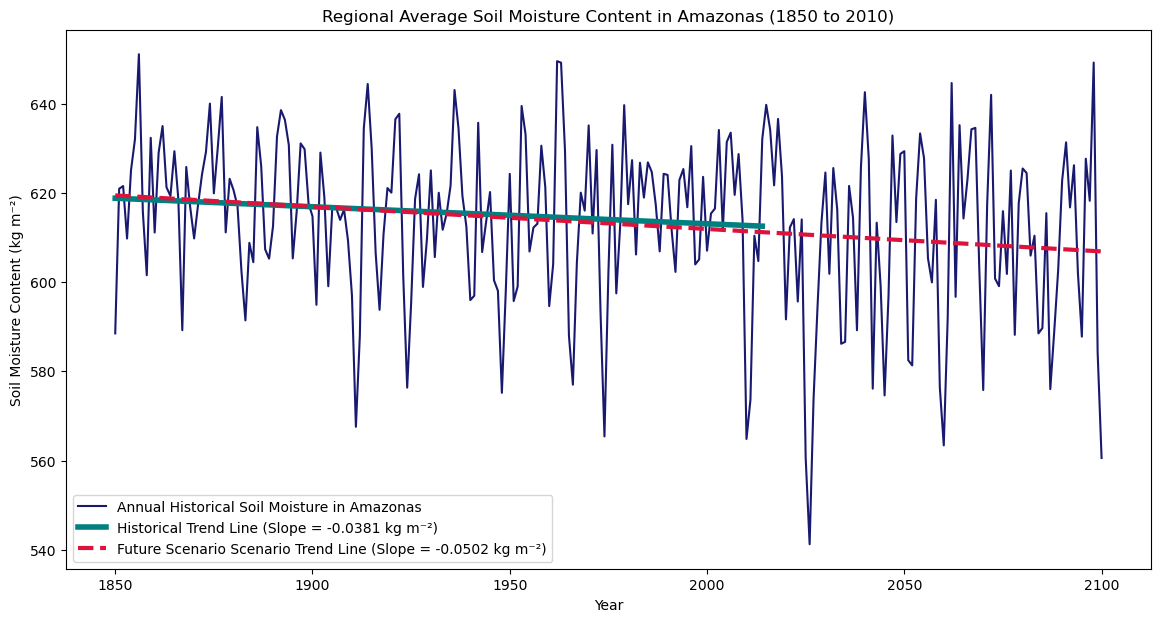

In [40]:
visualize_model(azhist_soil, az245_soil, 'Regional Average Soil Moisture Content in Amazonas (1850 to 2010)', [az_lat_min, az_lat_max, az_lon_min, az_lon_max])

-13.897789063039482 3.2657512406319285 106.6151773308195 124.3298263254249


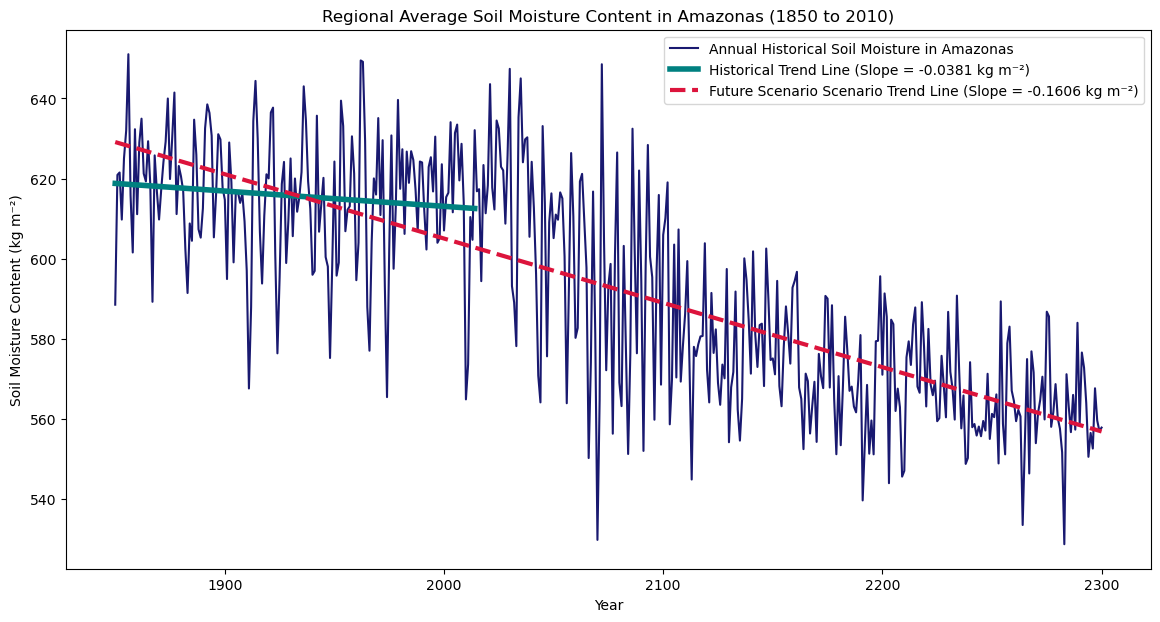

In [41]:
visualize_model(azhist_soil, az585_soil, 'Regional Average Soil Moisture Content in Amazonas (1850 to 2010)', [az_lat_min, az_lat_max, az_lon_min, az_lon_max])

30.08722546700274 37.534815567672254 7.644046124528245 11.778068815223975


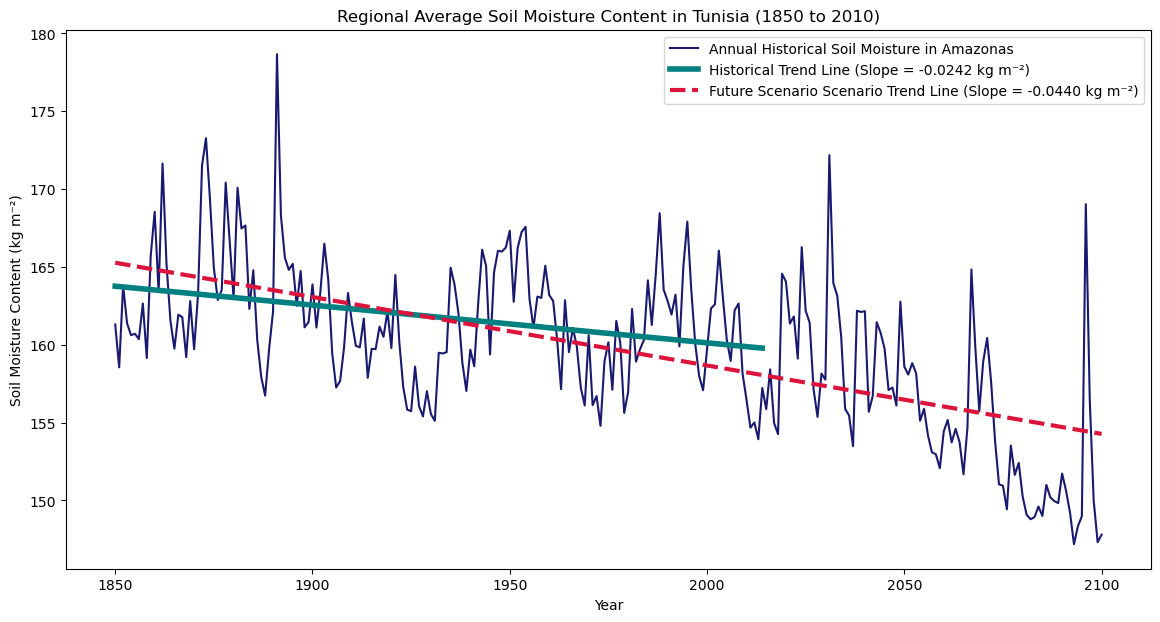

In [42]:
visualize_model(tuhist_soil, tu245_soil, 'Regional Average Soil Moisture Content in Tunisia (1850 to 2010)', [tu_lat_min, tu_lat_max, tu_lon_min, tu_lon_max])

30.08722546700274 37.534815567672254 7.644046124528245 11.778068815223975


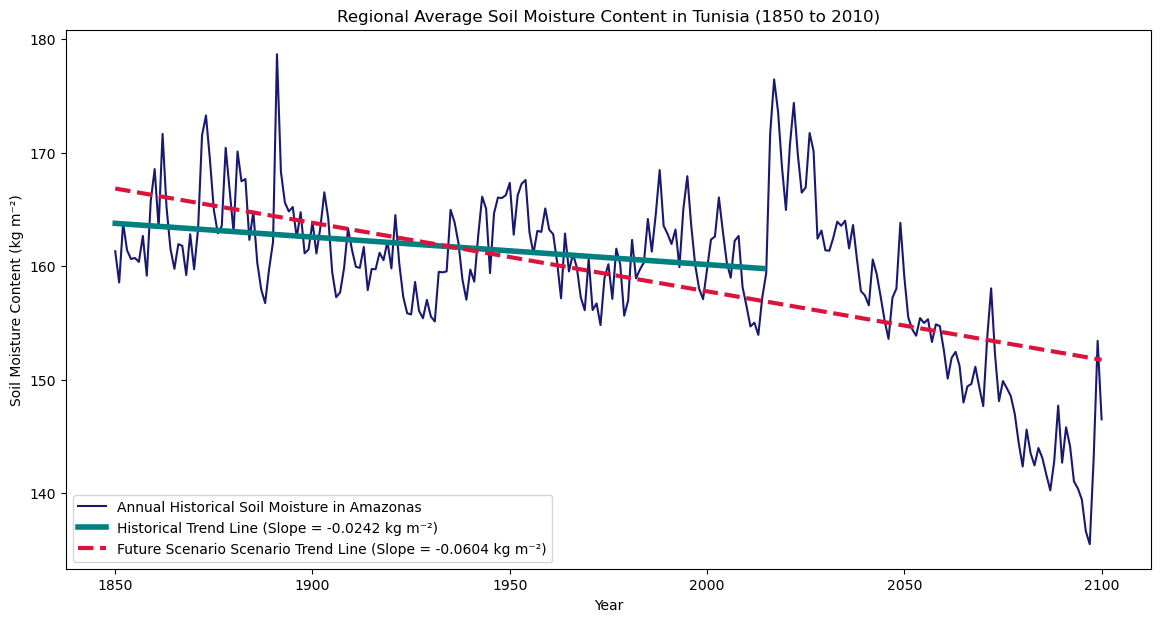

In [43]:
visualize_model(tuhist_soil, tu585_soil, 'Regional Average Soil Moisture Content in Tunisia (1850 to 2010)', [tu_lat_min, tu_lat_max, tu_lon_min, tu_lon_max])

# Interpretation

As expected, in a general sense the overall moisture content in the soil is projected to decrease over time until and possibly past 2100. It seems that increasing the amount of carbon released will drastically increase the rate in which this will happen in the amazon, while Tunisian mediterranean to saharan climate is't affected quite as much in this way. There could be a variety of reasons for this, such as the relationship between logging and carbon release, the relationship between warming temperatures and forest fires (which are a new problem for the amazonian region in the anthropogenic age), the relationship between temperature and transpiration. Etc. It's possible that Tunisia's biome which is comparatively much lower density in terms of it's biological elements is just isn't as visibily affected by these things. 

That being said, given what we know about desert ecosystems and desertification, the idea that Tunisia's climate is completely resiiliant to these effects is far from true. In actuality, desert ecosystems are very sensitive to disturbance because they exist and change over very long time scales. Without intervention, the arable land that Tunisia has will loose it's fertility.